<a href="https://colab.research.google.com/github/Asmaa-yb/CNN-CancerDetection/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Augmented_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Augmented_Dataset/Early/Early_0095.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0074.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0024.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0022.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0060.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0066.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0069.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0092.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0058.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0096.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0087.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0102.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0021.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0050.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0065.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0036.jpg
/content

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

X = []
Y = []
image_size = 224
labels = ['Benign', 'Early', 'Pre', 'Pro']
# Load all images and their labels
for label in labels:
    folder_path = os.path.join('/content/drive/MyDrive/Augmented_Dataset', label)
    for filename in os.listdir(folder_path): # lister tout les fichier qui sont dans le dossier
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(label)
# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3472, 224, 224, 3)
Testing data shape: (386, 224, 224, 3)


In [ ]:
pd.DataFrame(Y_train).value_counts()

,count
0,
Early,886
Pre,867
Pro,864
Benign,855


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y_train=label_encoder.fit_transform(Y_train)
Y_test=label_encoder.transform(Y_test)


In [ ]:
print(labels)
print(label_encoder.transform(labels))

['Benign', 'Early', 'Pre', 'Pro']
[0 1 2 3]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model=Sequential([
    #Block1
    layers.InputLayer(shape=[224,224,3]),
    layers.Conv2D(filters=32,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block2
    layers.Conv2D(filters=64,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block3
    layers.Conv2D(filters=128,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block4
    layers.Conv2D(filters=256,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Head
    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=4,activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         819,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,908,260 (7.28 MB)

 Trainable params: 1,908,260 (7.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
history=model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 821s 8s/step - accuracy: 0.3328 - loss: 12.2683 - val_accuracy: 0.7586 - val_loss: 0.6303
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 854s 8s/step - accuracy: 0.7058 - loss: 0.7311 - val_accuracy: 0.7557 - val_loss: 0.5320
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 866s 8s/step - accuracy: 0.7809 - loss: 0.5094 - val_accuracy: 0.8764 - val_loss: 0.3395
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 861s 8s/step - accuracy: 0.8327 - loss: 0.4189 - val_accuracy: 0.8707 - val_loss: 0.3641
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 866s 8s/step - accuracy: 0.8686 - loss: 0.3402 - val_accuracy: 0.9052 - val_loss: 0.3914
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 818s 8s/step - accuracy: 0.8785 - loss: 0.3166 - val_accuracy: 0.9253 - val_loss: 0.2434
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 857s 8s/step - accuracy: 0.9307 - loss: 0.1863 - val_accuracy: 0.9109 - val_loss: 0.2470
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 864s 8s/step - accuracy: 0.9380 - loss: 0.1699 - val_accuracy: 0.9253 - 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

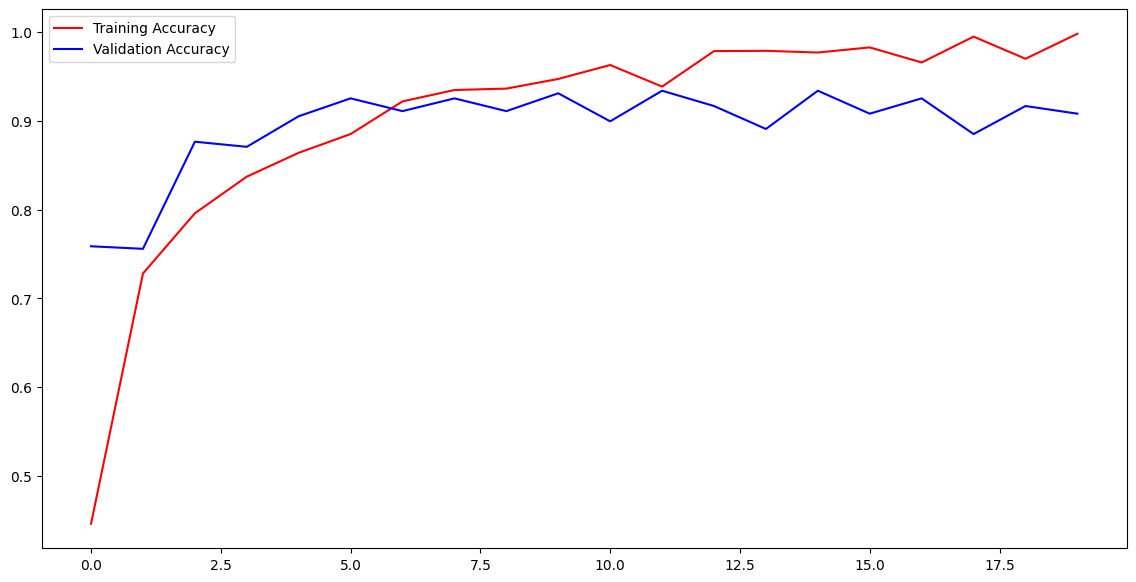

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

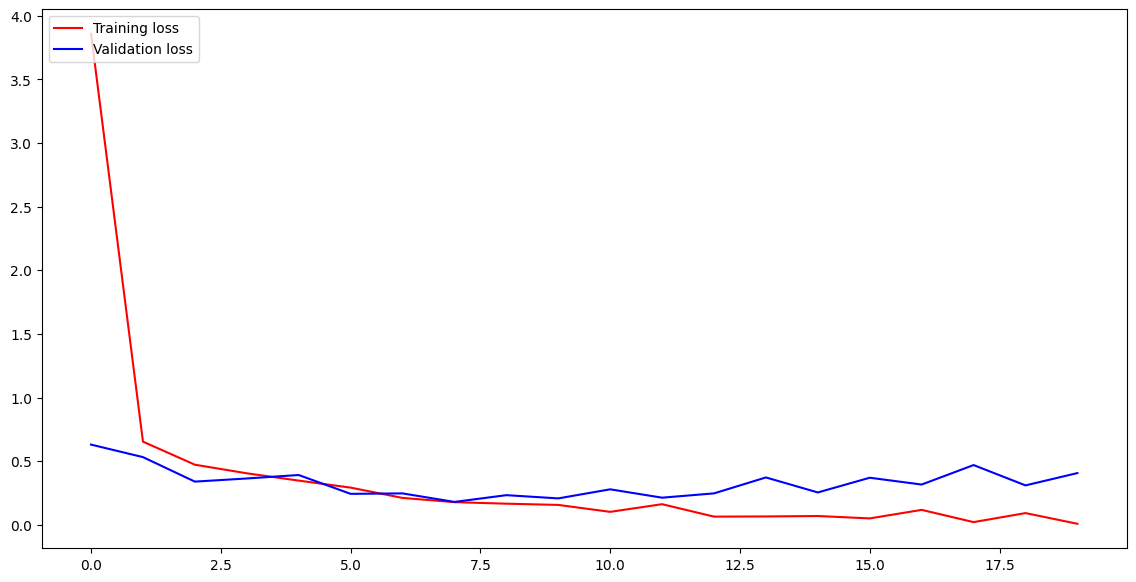

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1]*100) + '%')

Test Accuracy : 89.12%


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Augmented_Dataset/Pre/Pre_0008.jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

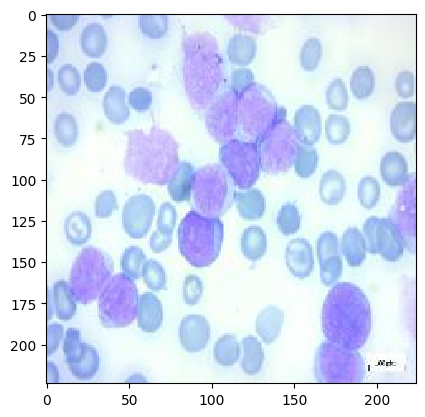

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Augmented_Dataset/Pre/Pre_0008.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


2

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)


report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step


In [ ]:
y_pred =model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()